### Read dataset from CSV file using pandas

In [0]:
import pandas as pd
import numpy as np
import datetime
from sklearn.neural_network import MLPRegressor

df = pd.read_csv('sp500_27270.csv')
df.head()

,Unnamed: 0,SP500,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,...,WMB,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
0,0,1676.12,104.8617,30.0317,38.7049,64.8930,16.0295,94.7727,50.820,3.86,...,27.0806,139.1379,22.8062,23.7407,41.0246,26.1189,46.4083,79.8048,25.8329,30.7332
1,1,1655.45,103.5100,29.5924,37.3865,63.7629,15.8936,93.2675,49.580,3.72,...,26.7222,137.5369,23.1504,23.1472,40.3263,25.5592,46.5642,79.9583,25.7091,30.3482
2,2,1656.40,103.8722,29.7359,37.6300,63.8719,15.8062,91.6441,49.450,3.65,...,26.6536,137.9919,23.3099,23.3070,40.3882,25.3820,43.4164,81.2242,25.6233,30.2520
3,3,1692.56,105.4360,30.2850,38.7061,64.7626,16.5538,94.5464,51.165,3.79,...,27.2559,142.0337,23.6288,24.3114,41.3517,26.0536,43.0638,82.4135,26.6429,31.1471
4,4,1703.20,106.6552,30.3931,38.6807,66.0803,16.5829,96.2288,52.190,3.83,...,27.5609,145.7606,23.7295,24.2886,41.7928,26.2122,43.7560,83.1136,26.9859,31.1856


### checking for nan values in dataset

In [0]:
df.isnull().any() 

### Investigate features correlation

In [0]:
corr = df.corr()
corr = corr['SP500']
# print(corr)

### Select features with correlation of >=0.95 or <=-0.95

In [0]:
selected_features = []
for i in range(2, corr.shape[0]):
    if corr[i] >= 0.95 or corr[i] <= -0.95:
        selected_features.append(corr.index[i])
        
print(selected_features)
print("Number of selected features: ", len(selected_features))
X = df[selected_features]
y = df['SP500']

['ACN', 'ATVI', 'ADBE', 'AET', 'AFL', 'A', 'ALL', 'AMT', 'APH', 'ADI', 'ANTM', 'AON', 'AAPL', 'AJG', 'ADSK', 'ADP', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BLK', 'CDNS', 'CTAS', 'CSCO', 'CTXS', 'CME', 'CSX', 'ECL', 'EXPD', 'FDX', 'HRS', 'IQV', 'JBHT', 'JPM', 'KLAC', 'LLL', 'LH', 'LRCX', 'LMT', 'MAR', 'MMC', 'MA', 'MSFT', 'NEE', 'NTRS', 'PGR', 'PLD', 'RJF', 'RTN', 'RSG', 'COL', 'ROP', 'SHW', 'SPGI', 'SYK', 'STI', 'SNPS', 'TEL', 'TXN', 'TMO', 'TMK', 'TSS', 'TDG', 'UNH', 'V', 'WM', 'WAT', 'XYL', 'YUM', 'ZTS']
Number of selected features:  71


### Normalize data

In [0]:
from sklearn import preprocessing

#Normalize Data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

print(y_scaled[:5])
print(y.head())

[-1.71687664 -1.78292298 -1.77988747 -1.66434631 -1.63034857]
0    1676.12
1    1655.45
2    1656.40
3    1692.56
4    1703.20
Name: SP500, dtype: float64


### Split data into train & validation, and test with 80% and 20% respectively
### train and validation are separated during fitting the model into 64% and 16% from the original data respectively

In [0]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y_scaled, test_size=0.2, random_state=1, shuffle=True )

### The used metric is Mean Squared Error 'MSE'

### SGD

In [0]:
reg_sgd = MLPRegressor(hidden_layer_sizes=(128), solver='sgd', learning_rate_init=0.0001)
reg_sgd.fit(X_train, y_train)
predicted_targets = reg_sgd.predict(X_test)

print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

MSE:  0.0417128780478


In [0]:
reg_sgd = MLPRegressor(hidden_layer_sizes=(128), solver='sgd', learning_rate_init=0.001)
reg_sgd.fit(X_train, y_train)
predicted_targets = reg_sgd.predict(X_test)

print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

MSE:  0.0106657920528


In [0]:
reg_sgd = MLPRegressor(hidden_layer_sizes=(128), solver='sgd', learning_rate_init=0.01)
reg_sgd.fit(X_train, y_train)
predicted_targets = reg_sgd.predict(X_test)

print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

MSE:  0.00359173100702


In [0]:
# reg_sgd = MLPRegressor(hidden_layer_sizes=(128), solver='sgd', learning_rate_init=0.1)
# reg_sgd.fit(X_train, y_train)
# predicted_targets = reg_sgd.predict(X_test)

# print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

In [0]:
# reg_sgd = MLPRegressor(hidden_layer_sizes=(128), solver='sgd', learning_rate_init=0.2)
# reg_sgd.fit(X_train, y_train)
# predicted_targets = reg_sgd.predict(X_test)

# print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

In [0]:
# reg_sgd = MLPRegressor(hidden_layer_sizes=(128), solver='sgd', learning_rate_init=0.00001)
# reg_sgd.fit(X_train, y_train)
# predicted_targets = reg_sgd.predict(X_test)

# print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

### Commenting on SGD
High learning rates in SGD can cause the model to diverge instead of converging.
For learning rates higher than 0.1, the model fail to fit producing an overflow error during convergence

### Adam

In [0]:
reg_adam = MLPRegressor(hidden_layer_sizes=(128), solver='adam', learning_rate_init=0.0001)
# reg_adam.fit(X_train, y_train, validation_split=0.2)
reg_adam.fit(X_train, y_train)
predicted_targets = reg_adam.predict(X_test)

# scores = cross_validate(reg_adam, X_train, y_train, scoring='precision_macro', cv=5)

print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

MSE:  0.0119173496082


In [0]:
reg_adam = MLPRegressor(hidden_layer_sizes=(128), solver='adam', learning_rate_init=0.001)
reg_adam.fit(X_train, y_train)
predicted_targets = reg_adam.predict(X_test)

print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

MSE:  0.00442500670821


In [0]:
reg_adam = MLPRegressor(hidden_layer_sizes=(128), solver='adam', learning_rate_init=0.01)
reg_adam.fit(X_train, y_train)
predicted_targets = reg_adam.predict(X_test)

print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

MSE:  0.00441349174736


In [0]:
reg_adam = MLPRegressor(hidden_layer_sizes=(128), solver='adam', learning_rate_init=0.1)
reg_adam.fit(X_train, y_train)
predicted_targets = reg_adam.predict(X_test)

print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

MSE:  0.0365150114174


In [0]:
reg_adam = MLPRegressor(hidden_layer_sizes=(128), solver='adam', learning_rate_init=0.2)
reg_adam.fit(X_train, y_train)
predicted_targets = reg_adam.predict(X_test)

print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

MSE:  0.459685315723


In [0]:
reg_adam = MLPRegressor(hidden_layer_sizes=(128), solver='adam', learning_rate_init=0.5)
reg_adam.fit(X_train, y_train)
predicted_targets = reg_adam.predict(X_test)

print("MSE: ", metrics.mean_squared_error(predicted_targets, y_test))

MSE:  55.0922057018


### Commenting on Adam
Adam shows the same pattern as SGD. 
However,sice Adam adopts the learning rate for each individual weight, it can converge even for learning rates higher than 0.1

### Regularization
The default technique of MLPRegressor gave the best results. This default technique is L2 regularizer with alpha of 0.0001.
Trying alpha of 0.01 worsened the MSE value.
Trying early stopping did not produce much improvement. It produced almost same results as the default value of alpha in MLPRegressor.

### Best Regressor
The best regressor contains a single layer with 128 nodes, uses Adam as an optimizer with learning rate of 0.01. 
This is the best architecture since a more complex models and more simple produced worse. 

In [0]:
reg_adam = MLPRegressor(hidden_layer_sizes=(128), solver='adam', learning_rate_init=0.01)
reg_adam.fit(X_train, y_train)

y_predicted = reg_adam.predict(X_test[:200])
y_target = y_test[:200]

# print(y_predicted)
# print(y_target)


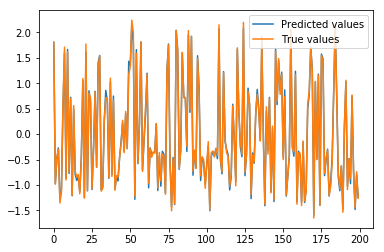

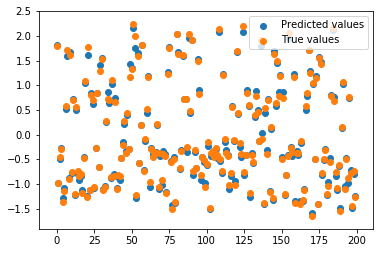

In [0]:
import matplotlib.pyplot as plt 

x = np.arange(y_predicted.size)

plt.plot(x, y_predicted, label='Predicted values')
plt.plot(x, y_target, label='True values')
plt.legend(loc='best')

plt.figure()
plt.scatter(x, y_predicted, label='Predicted values')
plt.scatter(x, y_target, label='True values')

plt.legend(loc='best')
plt.show()

Peak points were difficult to predict.
These values are otliers. In other words they are far from other data. By trying to predict these points correctly the regressor will risk overfitting. 
Peak points are points were the SP500 value changed rapidly during a very short duration of time.
In turn, the regressor found difficult accounting for this sudden change.

# Stock prices prediction- time series prediction

### Read dataset from CSV file using pandas

In [0]:
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv('sp500_27270.csv')
df.head()

,Unnamed: 0,SP500,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,...,WMB,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
0,0,1676.12,104.8617,30.0317,38.7049,64.8930,16.0295,94.7727,50.820,3.86,...,27.0806,139.1379,22.8062,23.7407,41.0246,26.1189,46.4083,79.8048,25.8329,30.7332
1,1,1655.45,103.5100,29.5924,37.3865,63.7629,15.8936,93.2675,49.580,3.72,...,26.7222,137.5369,23.1504,23.1472,40.3263,25.5592,46.5642,79.9583,25.7091,30.3482
2,2,1656.40,103.8722,29.7359,37.6300,63.8719,15.8062,91.6441,49.450,3.65,...,26.6536,137.9919,23.3099,23.3070,40.3882,25.3820,43.4164,81.2242,25.6233,30.2520
3,3,1692.56,105.4360,30.2850,38.7061,64.7626,16.5538,94.5464,51.165,3.79,...,27.2559,142.0337,23.6288,24.3114,41.3517,26.0536,43.0638,82.4135,26.6429,31.1471
4,4,1703.20,106.6552,30.3931,38.6807,66.0803,16.5829,96.2288,52.190,3.83,...,27.5609,145.7606,23.7295,24.2886,41.7928,26.2122,43.7560,83.1136,26.9859,31.1856


### Removing the first column "Unnamed: 0"

In [0]:
del df['Unnamed: 0']
df.head()

,SP500,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,...,WMB,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
0,1676.12,104.8617,30.0317,38.7049,64.8930,16.0295,94.7727,50.820,3.86,81.2615,...,27.0806,139.1379,22.8062,23.7407,41.0246,26.1189,46.4083,79.8048,25.8329,30.7332
1,1655.45,103.5100,29.5924,37.3865,63.7629,15.8936,93.2675,49.580,3.72,80.5379,...,26.7222,137.5369,23.1504,23.1472,40.3263,25.5592,46.5642,79.9583,25.7091,30.3482
2,1656.40,103.8722,29.7359,37.6300,63.8719,15.8062,91.6441,49.450,3.65,79.7746,...,26.6536,137.9919,23.3099,23.3070,40.3882,25.3820,43.4164,81.2242,25.6233,30.2520
3,1692.56,105.4360,30.2850,38.7061,64.7626,16.5538,94.5464,51.165,3.79,81.0434,...,27.2559,142.0337,23.6288,24.3114,41.3517,26.0536,43.0638,82.4135,26.6429,31.1471
4,1703.20,106.6552,30.3931,38.6807,66.0803,16.5829,96.2288,52.190,3.83,81.6084,...,27.5609,145.7606,23.7295,24.2886,41.7928,26.2122,43.7560,83.1136,26.9859,31.1856


### Investigate features correlation
### Select features with correlation of >=0.95 or <=-0.95

In [0]:
corr = df.corr()
corr = corr['SP500']
largest_2 = corr.nlargest(2, 'first')
print(largest_2)
most_corr_stock = largest_2.index[1]
most_corr_stock

SP500    1.000000
APH      0.988361
Name: SP500, dtype: float64


'APH'

In [0]:
df1 = df[most_corr_stock]
df1.head()

0    36.2702
1    35.8013
2    36.2127
3    36.4472
4    36.8634
Name: APH, dtype: float64

### Create a new DataFrame showing the past 3 days and the next 4 days

In [0]:
df2 = pd.DataFrame(
            {"t-4" : df1.shift(4),
             "t-3" : df1.shift(3),
             "t-2" : df1.shift(2),
             "t-1" : df1.shift(1),
             "t"   : df1.shift(0),
             "t+1" : df1.shift(-1),
             "t+2" : df1.shift(-2),
             "t+3" : df1.shift(-3),
             "t+4" : df1.shift(-4)
             })
cols = ['t-4', 't-3', 't-2', 't-1', 't', 't+1', 't+2', 't+3', 't+4']
df2 = df2[cols]
print(df2.head())
print(df2.tail())

       t-4      t-3      t-2      t-1        t      t+1      t+2      t+3  \
0      NaN      NaN      NaN      NaN  36.2702  35.8013  36.2127  36.4472   
1      NaN      NaN      NaN  36.2702  35.8013  36.2127  36.4472  36.8634   
2      NaN      NaN  36.2702  35.8013  36.2127  36.4472  36.8634  36.8873   
3      NaN  36.2702  35.8013  36.2127  36.4472  36.8634  36.8873  37.0548   
4  36.2702  35.8013  36.2127  36.4472  36.8634  36.8873  37.0548  37.8203   

       t+4  
0  36.8634  
1  36.8873  
2  37.0548  
3  37.8203  
4  38.8106  
        t-4    t-3    t-2    t-1      t    t+1    t+2    t+3    t+4
1255  94.05  93.60  93.47  94.02  94.47  93.96  93.51  91.60  90.52
1256  93.60  93.47  94.02  94.47  93.96  93.51  91.60  90.52    NaN
1257  93.47  94.02  94.47  93.96  93.51  91.60  90.52    NaN    NaN
1258  94.02  94.47  93.96  93.51  91.60  90.52    NaN    NaN    NaN
1259  94.47  93.96  93.51  91.60  90.52    NaN    NaN    NaN    NaN


### Removing nan values from the new DF

In [0]:
df2 = df2.dropna()
df2.head()

,t-4,t-3,t-2,t-1,t,t+1,t+2,t+3,t+4
4,36.2702,35.8013,36.2127,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106
5,35.8013,36.2127,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896
6,36.2127,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896,39.3943
7,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896,39.3943,39.2269
8,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896,39.3943,39.2269,39.0212


### Specifying predictors and predicted features

In [0]:
X = df2.loc[:,'t-4':'t']
y = df2.loc[:,'t+1':'t+4']
print("Predictors: \n \n", X.head(), '\n')
print("Predicted: \n \n", y.head())

Predictors: 
 
        t-4      t-3      t-2      t-1        t
4  36.2702  35.8013  36.2127  36.4472  36.8634
5  35.8013  36.2127  36.4472  36.8634  36.8873
6  36.2127  36.4472  36.8634  36.8873  37.0548
7  36.4472  36.8634  36.8873  37.0548  37.8203
8  36.8634  36.8873  37.0548  37.8203  38.8106 

Predicted: 
 
        t+1      t+2      t+3      t+4
4  36.8873  37.0548  37.8203  38.8106
5  37.0548  37.8203  38.8106  39.3896
6  37.8203  38.8106  39.3896  39.3943
7  38.8106  39.3896  39.3943  39.2269
8  39.3896  39.3943  39.2269  39.0212


### Normalizing the data to allow faster convergence of the weights

In [0]:
from sklearn import preprocessing

#Normalize Data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

### Splitting the data into train and test

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y_scaled, test_size=0.2, random_state=1, shuffle=True )

### Suitable scoring metric is MSE

### Building an MLPRegressor

In [0]:
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics

reg_adam = MLPRegressor(hidden_layer_sizes=(126), solver='adam', learning_rate_init=0.01)
                    
reg_adam.fit(X_train, y_train)
print("Score: ", reg_adam.score(X_test, y_test))

predicted_targets = reg_adam.predict(X_test)
print("MSE: ", metrics.mean_squared_error(predicted_targets,y_test))
reg_adam

Score:  0.993415530822
MSE:  0.00662133378321


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=126, learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### Diff. architectures MSE
#### hidden layers: 
- 1 layers, 126 nodes: 0.0058
- 2 layers, 64 nodes+10 nodes: 0.0065
- 1 layer,  100 nodes: 0.0082
- 2 layers, 126 nodes+10 nodes: 0.0085

#### optimizer
- adam, lr=0.01: 0.0052
- adam, lr= 0.001: 0.057
- adam, lr= 0.1: 0.024
- sgd, lr= 0.1:  0.026
- sgd, lr= 0.01: 0.051

#### regularization

- early stopping: 0.066
- alpha=0.01 : 0.059
- alpha=0.0001 : 0.060
- alpha=0.001 : 0.064

__optimum architecture: single hidden layer with 126 nodes, optimizer: adam, lr: 0.01 with default regularization of MLPRegressor which is l2 regulizer with alpha of 0.0001__

### Using the first three values of the test data to predict SP500 for the next 3 days

In [0]:
y_predicted = reg_adam.predict(X_test[0:3])
y_target = y_test[:3]
                    
print(y_predicted)
print(y_target)

[[-0.4089179  -0.41943217 -0.39316421 -0.41303508]
 [ 0.33961196  0.35823026  0.31476019  0.31925992]
 [ 1.74645444  1.71748098  1.64233738  1.59766837]]
[[-0.4459874  -0.43966644 -0.41496611 -0.40441576]
 [ 0.35490276  0.35679053  0.36124841  0.37303932]
 [ 1.71969005  1.54195895  1.36593479  1.47015771]]


### Plotting the target values and the predicted values for SP500 of three days

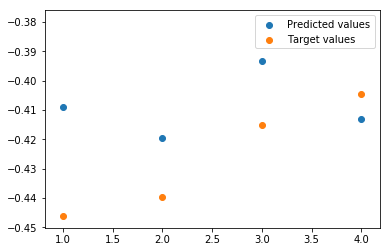

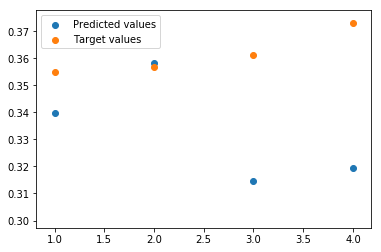

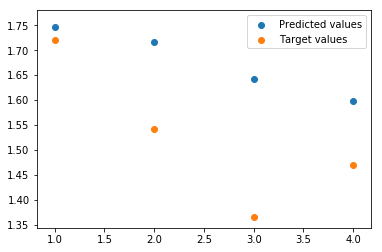

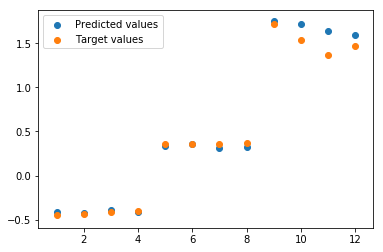

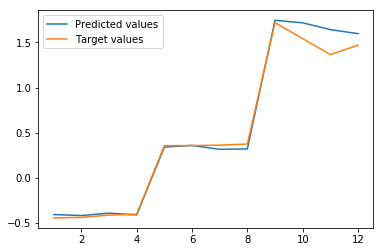

In [0]:
import matplotlib.pyplot as plt 

x = np.arange(1, 5, 1)
x.size

plt.scatter(x, y_predicted[0], label="Predicted values")
plt.scatter(x, y_target[0], label="Target values")
plt.legend(loc="best")

plt.figure()
plt.scatter(x, y_predicted[1], label="Predicted values")
plt.scatter(x, y_target[1], label="Target values")
plt.legend(loc="best")

plt.figure()
plt.scatter(x, y_predicted[2], label="Predicted values")
plt.scatter(x, y_target[2], label="Target values")
plt.legend(loc="best")

plt.figure()
x = np.arange(1, 13, 1)
plt.scatter(x, y_predicted, label="Predicted values")
plt.scatter(x, y_target, label="Target values")
plt.legend(loc="best")

plt.figure()
plt.plot(x, y_predicted.reshape((12,)), label="Predicted values")
plt.plot(x, y_target.reshape((12,)), label="Target values")
plt.legend(loc="best")

plt.show()

Values that were predicted correctly are based on the pattern that shows that the stock price during a consecative 4 days is the same, with a minor change.

In the third set, the true values did not follow the pattern as with the first and second the sets.

Inturn, the predicted values were following the pattern and did not show the abrupt change in the stock price on the second, third and fourth days